In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read csv file and load the data
converters = {'Mission Time': float, 'Partition Time': float, 'Path Planning Time': float, 'Algorithm Time': float}
ablation_data = pd.read_csv('ablation_study_variable_robots.csv')

In [6]:
ablation_data.head(5)

,Map,Algorithm,Ablation Mode,Mission Time,Partition Time,Path Planning Time,Algorithm Time
0,Small,SCoPP,Partition Ablation,302.5,0.031006,0.076040,1.189290
1,Small,SCoPP,Partition Ablation,302.5,0.030962,0.064618,1.375752
2,Small,SCoPP,Partition Ablation,302.5,0.030996,0.063964,1.382737
3,Small,SCoPP,Partition Ablation,302.5,0.030995,0.064000,1.363055
4,Small,SCoPP,Partition Ablation,302.5,0.045000,0.061893,1.414034


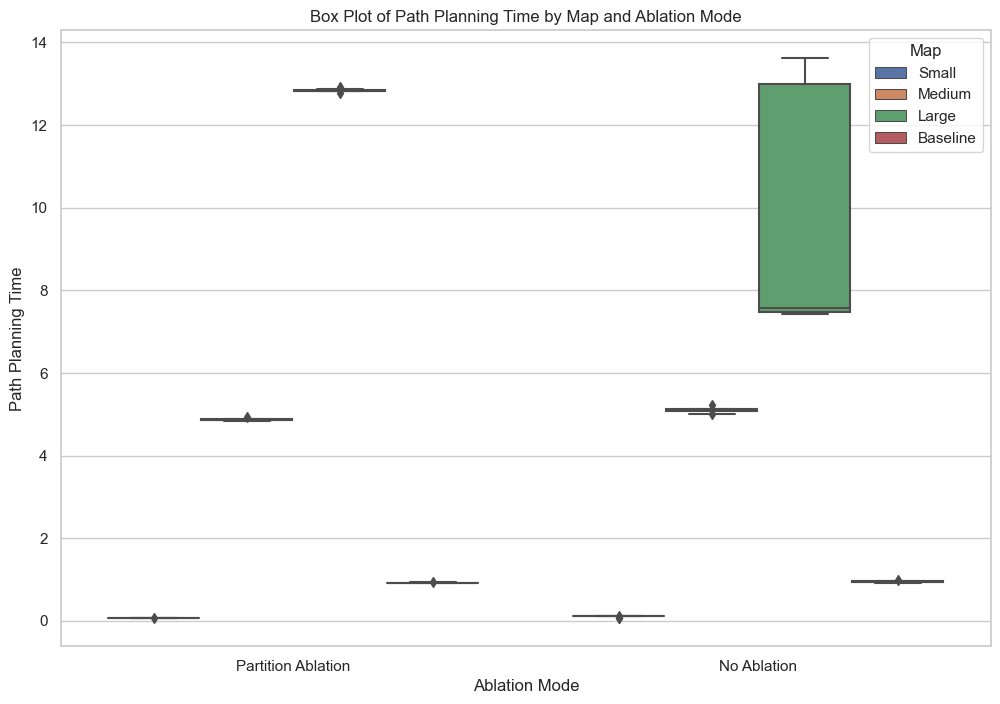

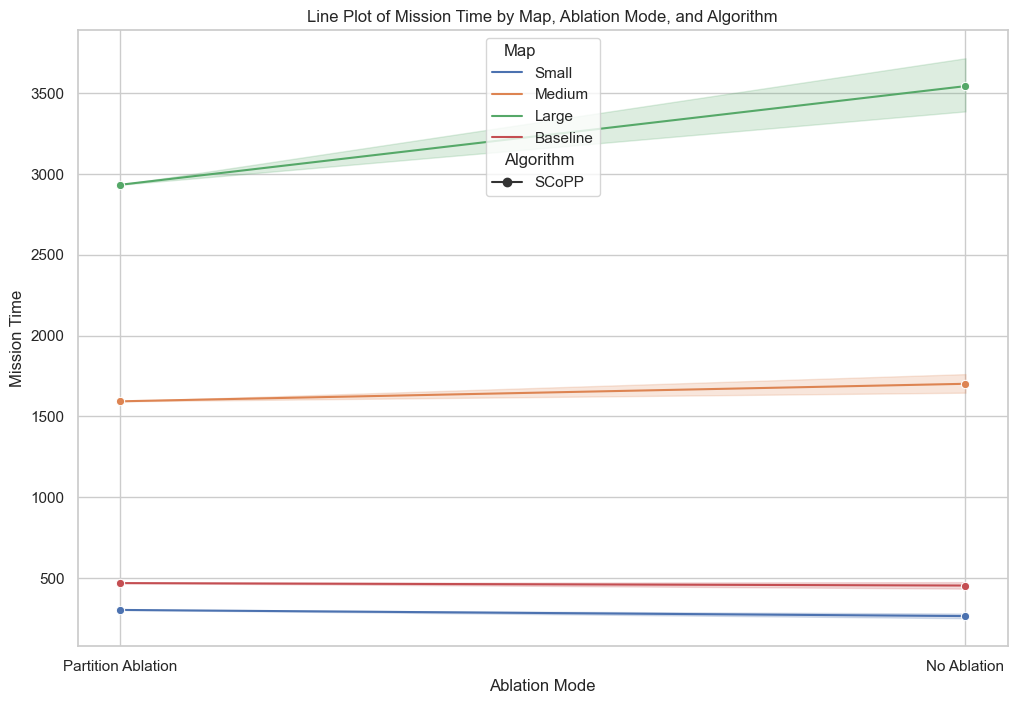

In [3]:
# We'll plot the data a few different ways, separating by map and ablation mode mainly.

# Box plots
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Box plot for Path Planning Time
sns.boxplot(x="Ablation Mode", y="Path Planning Time", hue="Map", data=ablation_data)
plt.title('Box Plot of Path Planning Time by Map and Ablation Mode')
plt.show()

# Line plots
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Line plot for Mission Time
sns.lineplot(x="Ablation Mode", y="Mission Time", hue="Map", style="Algorithm", markers=True, data=ablation_data)
plt.title('Line Plot of Mission Time by Map, Ablation Mode, and Algorithm')
plt.show()

        Map       Ablation Mode  Mission Time  Partition Time  \
0  Baseline         No Ablation        453.47        0.081814   
1  Baseline  Partition Ablation        468.60        0.072349   
2     Large         No Ablation       3543.53       27.511020   
3     Large  Partition Ablation       2933.00       22.110776   
4    Medium         No Ablation       1701.76        4.636681   
5    Medium  Partition Ablation       1593.30        4.226981   
6     Small         No Ablation        264.44        0.087352   
7     Small  Partition Ablation        302.50        0.032680   

   Path Planning Time  Algorithm Time  
0            0.947261        1.320494  
1            0.922562        1.286230  
2            9.698094      347.080107  
3           12.842056      496.460266  
4            5.098992       16.449246  
5            4.870947       15.962807  
6            0.109517        2.196293  
7            0.064584        1.361955  


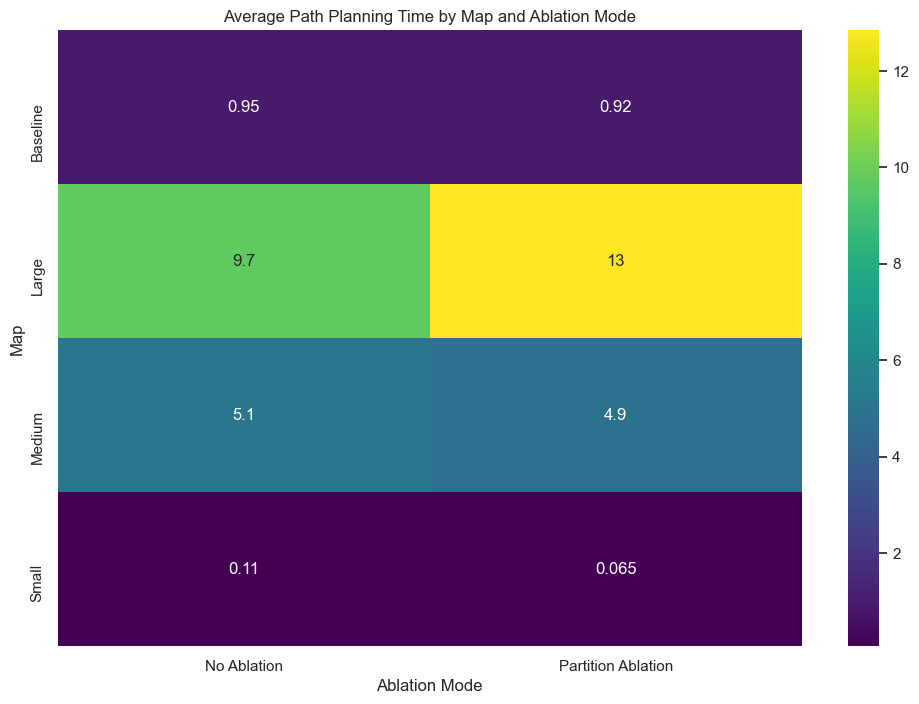

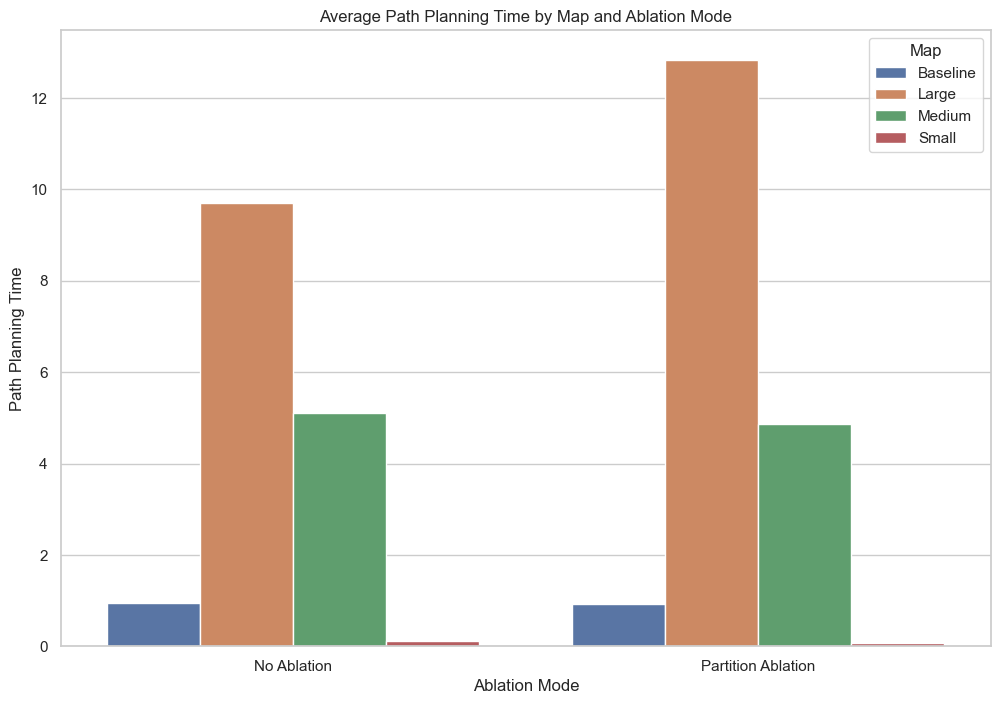

In [4]:
# Well, that looks horrible. Let's do a table instead

# Group by 'Map' and 'Ablation Mode' and calculate the mean
avg_data = ablation_data.groupby(['Map', 'Ablation Mode']).mean().reset_index()

# Display the resulting DataFrame
print(avg_data)

# Pivot the DataFrame for heatmap
avg_data_pivot = avg_data.pivot(index='Map', columns='Ablation Mode', values='Path Planning Time')

# Heatmap for averages
plt.figure(figsize=(12, 8))
sns.heatmap(avg_data_pivot, annot=True, cmap='viridis')
plt.title('Average Path Planning Time by Map and Ablation Mode')
plt.show()

# Bar plot for averages
plt.figure(figsize=(12, 8))
sns.barplot(x="Ablation Mode", y="Path Planning Time", hue="Map", data=avg_data)
plt.title('Average Path Planning Time by Map and Ablation Mode')
plt.show()

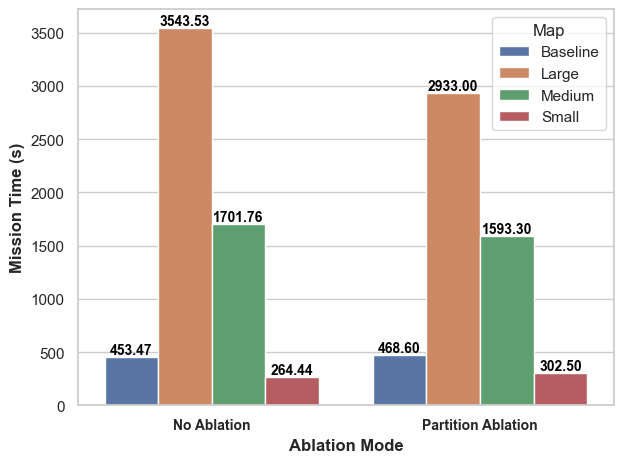

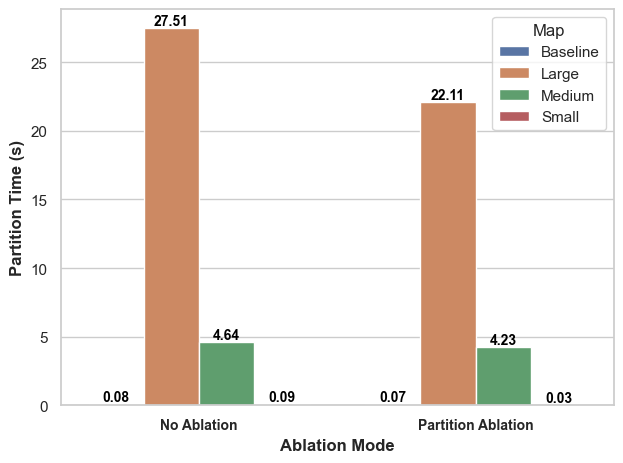

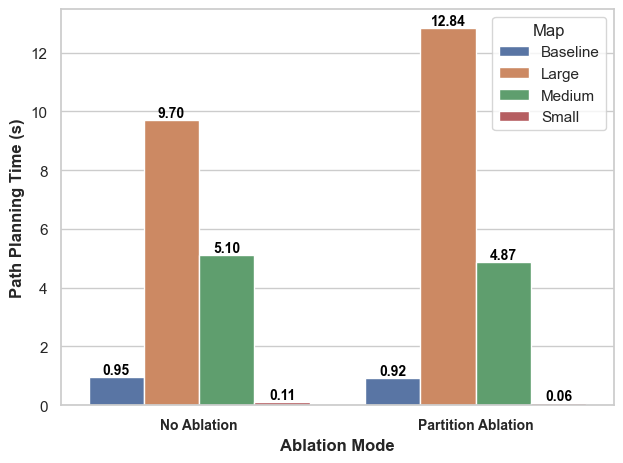

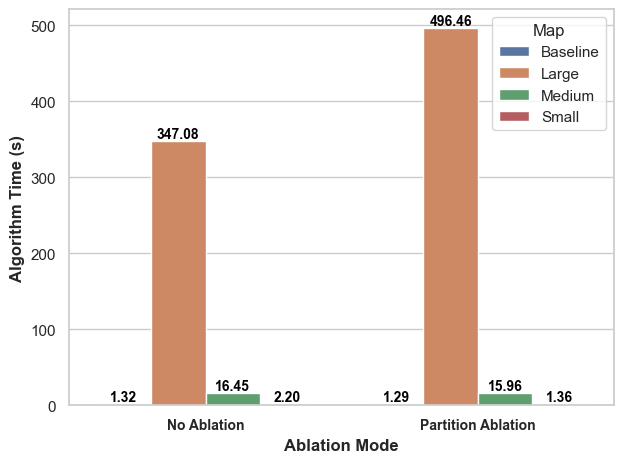

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'avg_data' is your DataFrame with the average values

# Function to annotate each bar with the exact number
def annotate_bars(plot):
    for p in plot.patches:
        plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, fontweight='bold', color='black', xytext=(0, 5),
                      textcoords='offset points')

# Bar plot for Mission Time
mission_time_plot = sns.barplot(x="Ablation Mode", y="Mission Time", hue="Map", data=avg_data)
# mission_time_plot.set_title('Mission Time', fontsize=16, fontweight='bold')
mission_time_plot.set_ylabel('Mission Time (s)', fontsize=12, fontweight='bold')
mission_time_plot.set_xticklabels(mission_time_plot.get_xticklabels(), fontsize=10, fontweight='bold')
mission_time_plot.set_xlabel(mission_time_plot.get_xlabel(), fontsize=12, fontweight='bold')
annotate_bars(mission_time_plot)
plt.tight_layout()
plt.savefig("mission_time_plot.png", dpi=300)
plt.show()

# Bar plot for Partition Time
partition_time_plot = sns.barplot(x="Ablation Mode", y="Partition Time", hue="Map", data=avg_data)
# partition_time_plot.set_title('Partition Time', fontsize=16, fontweight='bold')
partition_time_plot.set_ylabel('Partition Time (s)', fontsize=12, fontweight='bold')
partition_time_plot.set_xticklabels(partition_time_plot.get_xticklabels(), fontsize=10, fontweight='bold')
partition_time_plot.set_xlabel(partition_time_plot.get_xlabel(), fontsize=12, fontweight='bold')
annotate_bars(partition_time_plot)
plt.tight_layout()
plt.savefig("partition_time_plot.png", dpi=300)
plt.show()

# Bar plot for Path Planning Time
path_planning_time_plot = sns.barplot(x="Ablation Mode", y="Path Planning Time", hue="Map", data=avg_data)
# path_planning_time_plot.set_title('Path Planning Time', fontsize=16, fontweight='bold')
path_planning_time_plot.set_ylabel('Path Planning Time (s)', fontsize=12, fontweight='bold')
path_planning_time_plot.set_xticklabels(path_planning_time_plot.get_xticklabels(), fontsize=10, fontweight='bold')
path_planning_time_plot.set_xlabel(path_planning_time_plot.get_xlabel(), fontsize=12, fontweight='bold')
annotate_bars(path_planning_time_plot)
plt.tight_layout()
plt.savefig("path_planning_time_plot.png", dpi=300)
plt.show()

# Bar plot for Algorithm Time
algorithm_time_plot = sns.barplot(x="Ablation Mode", y="Algorithm Time", hue="Map", data=avg_data)
# algorithm_time_plot.set_title('Algorithm Time', fontsize=16, fontweight='bold')
algorithm_time_plot.set_ylabel('Algorithm Time (s)', fontsize=12, fontweight='bold')
algorithm_time_plot.set_xticklabels(algorithm_time_plot.get_xticklabels(), fontsize=10, fontweight='bold')
algorithm_time_plot.set_xlabel(algorithm_time_plot.get_xlabel(), fontsize=12, fontweight='bold')
annotate_bars(algorithm_time_plot)
plt.tight_layout()
plt.savefig("algorithm_time_plot.png", dpi=300)
plt.show()


